The code below estimates $\int_0^x e^{x^2/2}$

In [5]:
hx = function(x, u){
        exp((-(x*u)^2)/2)
}

In [22]:
xs = seq(0.1, 3, 0.1)
n = 10000
true = rep(NA, length(xs))
est = rep(NA, length(xs))
error = rep(NA, length(xs))
ses = rep(NA, length(xs))
upper_bound = rep(NA, length(xs))
lower_bound = rep(NA, length(xs))

for (i in 1:length(xs)){
    x = xs[i]
    u = runif(n)
    true[i] = pnorm(x) # compare to true
    theta_hat = 0.5 + x*mean(hx(x, u))*(1/sqrt(2*pi))
    est[i] = theta_hat # calculate estimate
    se = sqrt(sum((x * hx(x, u) * (1 / sqrt(2 * pi) + 0.5) - theta_hat)^2)) / n
    ses[i] = se
    z = qnorm(0.025, lower.tail = FALSE)
    CI = c(theta_hat - se * z, theta_hat + se * z)
    lower_bound[i] = CI[1]
    upper_bound[i] = CI[2]
}

data.frame(xs, true, est, lower_bound, upper_bound, ses)

xs,true,est,lower_bound,upper_bound,ses
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.1,0.5398278,0.5398276,0.5310062,0.5486491,0.004500835
0.2,0.5792597,0.5792666,0.5714139,0.5871193,0.004006554
0.3,0.6179114,0.6179245,0.6110211,0.6248279,0.003522214
0.4,0.6554217,0.6553690,0.6493835,0.6613545,0.003053888
0.5,0.6914625,0.6913938,0.6862859,0.6965017,0.002606101
0.6,0.7257469,0.7258098,0.7215240,0.7300956,0.002186651
0.7,0.7580363,0.7581691,0.7546175,0.7617208,0.001812100
0.8,0.7881446,0.7879720,0.7850020,0.7909420,0.001515341
0.9,0.8159399,0.8160199,0.8134111,0.8186286,0.001331009


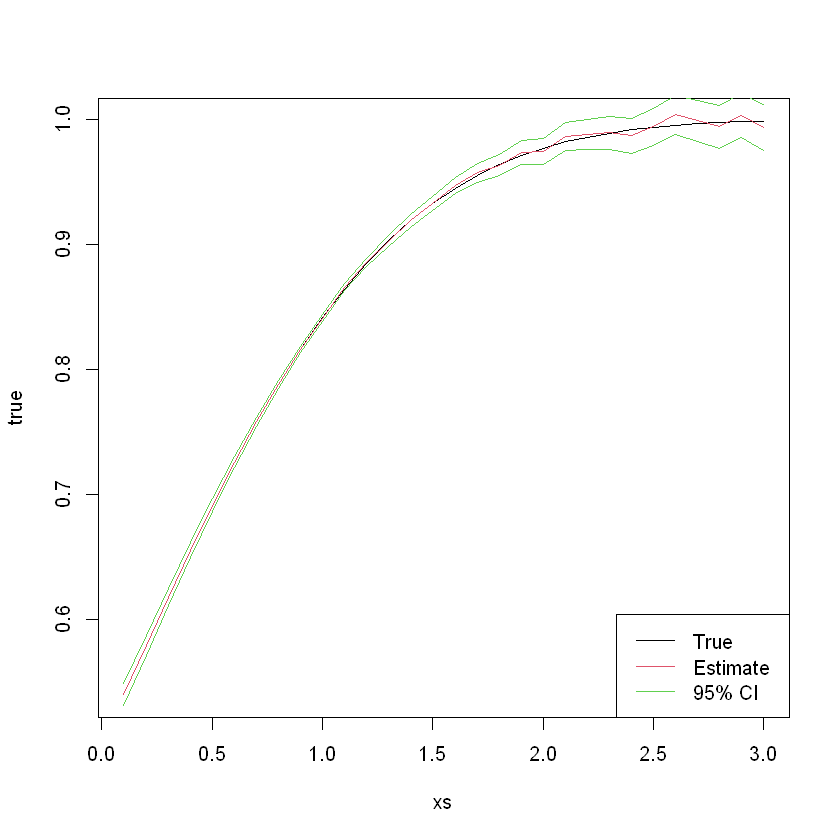

In [32]:
plot(xs, true, 'l', col = 1)
lines(xs, est, col = 2)
lines(xs, upper_bound, col = 3)
lines(xs, lower_bound, col = 3)
legend("bottomright", legend=c("True", "Estimate", "95% CI"), col=c(1, 2, 3),  lty=1)